## Load Libraries

In [26]:
#pip install geopy
#pip install selenium
#pip install gmplot
#conda install --channel conda-forge geopandas

import folium
import geopy
import os
import gmplot
import numpy
import pandas as pd
from folium.plugins import HeatMap
from geopy import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from IPython.display import display
import matplotlib.pyplot as plt

## Set Directory

In [27]:
#os.getcwd()
#os.listdir()
#os.chdir('..')

os.chdir('/Users/gml/Desktop/Final Project')

## Read in Data Sets

In [28]:
df_h = pd.read_csv('data.csv')
df_h['SaleAmount'] = df_h['SaleAmount'].astype(int) 
df_h['Acres'] = df_h['Acres'].astype(int)
df_h['AboveGradeArea']=df_h['AboveGradeArea'].astype(int) 

/Users/gml/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
df_n = pd.read_csv('MSPUS.csv')
df_n['Qtr_Period']= df_n.apply(lambda x: pd.Period(x['DATE'],'Q'), axis=1)
df_n['Qtr_Period'] = df_n['Qtr_Period'].astype(str) 
df_n = df_n.drop(['DATE', 'Year'], axis=1)

In [30]:
#test = pd.read_csv('address.csv')
#demo['ADDRESS','longitude','latitude'] = test[['ADDRESS','X','Y']].head()

## Join Data Sets

In [31]:
#df_h = df_h.set_index('ADDRESS').join(demo.set_index('ADDRESS'))
#df_h.reset_index(level=0, inplace=True)

df = df_h.set_index('Qtr_Period').join(df_n.set_index('Qtr_Period'))
df.reset_index(level=0, inplace=True)
df['AboveAverage'] = (df['SaleAmount'] > df['MSPUS']).astype(int)

## Optional: Obtain Missing GIS Data

In [32]:
#locator = Nominatim(user_agent='myGeocoder')
#df = df[df['PostalCode'].notna()]
#df["loc"] = df["ADDRESS"].astype('str') + ', ' +
#                df["City"].astype('str') + ' CO ' +  
#                (df["PostalCode"].astype('int')).astype('str')

#geocode = RateLimiter(locator.geocode, min_delay_seconds=.0001)
#df['location'] = df['loc'].apply(geocode)
#df = df[df['location'].notna()]
#df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
#df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)

## Create Factors/Bins

In [33]:
testholder = pd.cut(df['YearBuilt'], [1860, 1870, 1880, 1890, 1900, 
                                      1910, 1920, 1930, 1940, 1950, 
                                      1960, 1970, 1980, 1990, 2000, 
                                      2010, 2019], labels=False, retbins=True, right=False)
df['builtbin'] = testholder[0]

holder = pd.cut(df['YearBuilt'], [1860, 1870, 1880, 1890, 1900, 
                                  1910, 1920, 1930, 1940, 1950, 
                                  1960, 1970, 1980, 1990, 2000, 
                                  2010, 2019])

In [34]:
testholder1 = pd.cut(df['AboveGradeArea'], [300, 800, 1300, 1800, 2300, 
                                            2800, 3300, 3800, 4300, 4800, 
                                            5300, 5800, 6300, 6800], labels=False, retbins=True, right=False)
df['SQFTbin'] = testholder1[0]

holder1 = pd.cut(df['AboveGradeArea'], [300, 800, 1300, 1800, 2300, 
                                        2800, 3300, 3800, 4300, 4800, 
                                        5300, 5800, 6300, 6800])

## Answer Questions Via, Plots or Pivot Tables

In [35]:
# answer 1

df.pivot_table(aggfunc={'Month':'count'}, index='Month', columns='Year')

Month                                               
Year    1990    1995    2000    2005   2010    2015    2019
Month                                                      
1      454.0     NaN   798.0   801.0  407.0   679.0   623.0
2      474.0   178.0   984.0   929.0  515.0   768.0   734.0
3      654.0  1213.0  1278.0  1241.0  726.0  1124.0   910.0
4      637.0  1241.0  1217.0  1277.0  861.0  1229.0  1050.0
5      769.0  1403.0  1439.0  1408.0  910.0  1396.0  1282.0
6      826.0  1418.0  1488.0  1504.0  777.0  1501.0  1183.0
7      834.0  1442.0  1319.0  1405.0  552.0  1523.0  1187.0
8      929.0  1492.0  1424.0  1440.0  623.0  1353.0  1108.0
9      717.0  1286.0  1401.0  1305.0  612.0  1336.0    52.0
10     776.0  1235.0  1211.0  1148.0  575.0  1253.0    13.0
11     642.0  1111.0  1177.0  1040.0  586.0   960.0     5.0
12     571.0  1010.0   985.0   962.0  572.0  1138.0     2.0

In [36]:
# answer 1

a = df.groupby('Year')['SaleAmount'].mean()
b = df.groupby('Year')['MSPUS'].mean()
print(a.index[:])
print(b.index[:])

Int64Index([1990, 1995, 2000, 2005, 2010, 2015, 2019], dtype='int64', name='Year')
Int64Index([1990, 1995, 2000, 2005, 2010, 2015, 2019], dtype='int64', name='Year')


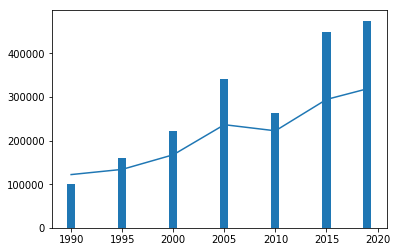

In [37]:
# answer 1

fig = plt.figure()
ax = fig.gca()

ax.bar(a.index[:], a)
ax.plot(a.index[:], b)

plt.show()

In [38]:
# answer 2 & 3

df.pivot_table(aggfunc={'SaleAmount':'median', 'MSPUS':'median'}, index='Qtr_Period', columns='Year')

MSPUS                                                    \
Year            1990      1995      2000      2005      2010      2015   
Qtr_Period                                                               
1990Q1      123900.0       NaN       NaN       NaN       NaN       NaN   
1990Q2      126800.0       NaN       NaN       NaN       NaN       NaN   
1990Q3      117000.0       NaN       NaN       NaN       NaN       NaN   
1990Q4      121500.0       NaN       NaN       NaN       NaN       NaN   
1995Q1           NaN  130000.0       NaN       NaN       NaN       NaN   
1995Q2           NaN  133900.0       NaN       NaN       NaN       NaN   
1995Q3           NaN  132000.0       NaN       NaN       NaN       NaN   
1995Q4           NaN  138000.0       NaN       NaN       NaN       NaN   
2000Q1           NaN       NaN  165300.0       NaN       NaN       NaN   
2000Q2           NaN       NaN  163200.0       NaN       NaN       NaN   
2000Q3           NaN       NaN  168800.0       NaN       NaN       NaN   
2000Q4           NaN       NaN  172900.0       NaN       NaN       NaN   
2005Q1           NaN       NaN       NaN  232500.0       NaN       NaN   
2005Q2           NaN       NaN       NaN  233700.0       NaN       NaN   
2005Q3           NaN       NaN       NaN  236400.0       NaN       NaN   
2005Q4           NaN       NaN       NaN  243600.0       NaN       NaN   
2010Q1           NaN       NaN       NaN       NaN  222900.0       NaN   
2010Q2           NaN       NaN       NaN       NaN  219500.0       NaN   
2010Q3           NaN       NaN       NaN       NaN  224100.0       NaN   
2010Q4           NaN       NaN       NaN       NaN  224300.0       NaN   
2015Q1           NaN       NaN       NaN       NaN       NaN  289200.0   
2015Q2           NaN       NaN       NaN       NaN       NaN  289100.0   
2015Q3           NaN       NaN       NaN       NaN       NaN  295800.0   
2015Q4           NaN       NaN       NaN       NaN       NaN  302500.0   
2019Q1           NaN       NaN       NaN       NaN       NaN       NaN   
2019Q2           NaN       NaN       NaN       NaN       NaN       NaN   
2019Q3           NaN       NaN       NaN       NaN       NaN       NaN   
2019Q4           NaN       NaN       NaN       NaN       NaN       NaN   

                     SaleAmount                                          \
Year            2019       1990      1995      2000      2005      2010   
Qtr_Period                                                                
1990Q1           NaN    83075.0       NaN       NaN       NaN       NaN   
1990Q2           NaN    86950.0       NaN       NaN       NaN       NaN   
1990Q3           NaN    87950.0       NaN       NaN       NaN       NaN   
1990Q4           NaN    87900.0       NaN       NaN       NaN       NaN   
1995Q1           NaN        NaN  123900.0       NaN       NaN       NaN   
1995Q2           NaN        NaN  127900.0       NaN       NaN       NaN   
1995Q3           NaN        NaN  129900.0       NaN       NaN       NaN   
1995Q4           NaN        NaN  130200.0       NaN       NaN       NaN   
2000Q1           NaN        NaN       NaN  178000.0       NaN       NaN   
2000Q2           NaN        NaN       NaN  186000.0       NaN       NaN   
2000Q3           NaN        NaN       NaN  190000.0       NaN       NaN   
2000Q4           NaN        NaN       NaN  194000.0       NaN       NaN   
2005Q1           NaN        NaN       NaN       NaN  233000.0       NaN   
2005Q2           NaN        NaN       NaN       NaN  240000.0       NaN   
2005Q3           NaN        NaN       NaN       NaN  245000.0       NaN   
2005Q4           NaN        NaN       NaN       NaN  250000.0       NaN   
2010Q1           NaN        NaN       NaN       NaN       NaN  218000.0   
2010Q2           NaN        NaN       NaN       NaN       NaN  227000.0   
2010Q3           NaN        NaN       NaN       NaN       NaN  230000.0   
2010Q4           NaN        NaN       NaN       NaN       NaN  218500.

In [39]:
df.pivot_table('SaleAmount', index=['PostalCode'], columns = ['Year'], aggfunc='count')

Year,1990,1995,2000,2005,2010,2015,2019
PostalCode,,,,,,,
80002.0,196.0,331.0,324.0,537.0,218.0,379.0,196.0
80003.0,518.0,681.0,776.0,683.0,384.0,786.0,476.0
80004.0,504.0,715.0,830.0,803.0,464.0,813.0,505.0
80005.0,566.0,655.0,679.0,847.0,479.0,774.0,452.0
80007.0,33.0,214.0,187.0,225.0,173.0,726.0,544.0
80020.0,177.0,240.0,253.0,176.0,122.0,184.0,124.0
80021.0,560.0,879.0,713.0,679.0,315.0,681.0,335.0
80031.0,48.0,45.0,78.0,83.0,37.0,49.0,44.0
80033.0,258.0,422.0,502.0,513.0,301.0,546.0,291.0


In [40]:
# answer 4

df.pivot_table('Month', index=['PropertyType'], columns = ['Year','AboveAverage'], aggfunc='count')

Year                     1990            1995            2000            2005  \
AboveAverage                0       1       0       1       0       1       0   
PropertyType                                                                    
Apartment                 NaN     NaN     6.0    73.0     NaN    11.0     2.0   
Automotive                NaN     NaN     4.0     5.0     1.0     NaN     2.0   
Business/Office          96.0    48.0    78.0   155.0    14.0    27.0    79.0   
Community                 NaN     NaN     1.0     1.0     NaN     NaN     1.0   
Condo, Res: Attached    102.0     2.0   675.0    37.0  1542.0    74.0  1317.0   
Duplex: Two Family       10.0     5.0    66.0    73.0    55.0   295.0    74.0   
Food                      NaN     NaN     1.0    17.0     NaN     3.0     NaN   
Government Buildings      NaN     NaN     1.0     2.0     NaN     NaN     NaN   
Group Living              NaN     NaN     2.0     4.0     NaN     3.0     4.0   
Health Care               NaN     NaN     NaN     9.0     1.0     2.0     2.0   
Hotel                     NaN     NaN     NaN     NaN     NaN     1.0     NaN   
Industrial                NaN     NaN     2.0    18.0     NaN     6.0    20.0   
Mobile Homes              NaN     1.0     NaN     1.0     NaN     NaN     NaN   
Outdoor                   1.0     NaN     NaN     1.0     NaN     1.0     NaN   
Retail                    NaN     NaN     5.0    28.0     3.0     2.0     8.0   
Single Family          6022.0  1713.0  5239.0  5342.0  2092.0  8425.0  3902.0   
Townhomes               277.0     6.0  1010.0   170.0  1605.0   549.0  1454.0   
Triplex: Three Family     NaN     NaN     1.0     2.0     1.0     8.0     2.0   

Year                             2010            2015           2019          
AboveAverage                1       0       1       0       1      0       1  
PropertyType                                                                  
Apartment                85.0     NaN     NaN     6.0   100.0    NaN     NaN  
Automotive               17.0     NaN     NaN     NaN    13.0    NaN     NaN  
Business/Office         212.0     1.0     1.0    76.0   120.0    NaN     NaN  
Community                 3.0     NaN     NaN     2.0     7.0    NaN     NaN  
Condo, Res: Attached    112.0   671.0    56.0  1363.0    67.0  649.0   118.0  
Duplex: Two Family      217.0    72.0    93.0    96.0   255.0   15.0   214.0  
Food                     38.0     NaN     NaN     1.0    37.0    NaN     NaN  
Government Buildings      2.0     NaN     NaN     NaN     2.0    NaN     NaN  
Group Living             12.0     NaN     4.0     2.0     7.0    NaN     NaN  
Health Care              15.0     NaN     NaN     2.0    23.0    NaN     NaN  
Hotel                     5.0     NaN     NaN     NaN     5.0    NaN     NaN  
Industrial               49.0     NaN     NaN    48.0    48.0    NaN     NaN  
Mobile Homes              NaN     3.0     NaN   111.0     NaN    NaN     NaN  
Outdoor                   2.0     NaN     NaN     3.0     1.0    NaN     NaN  
Retail                   54.0     NaN     NaN     2.0    64.0    NaN     NaN  
Single Family          6384.0  2291.0  3598.0  2983.0  7022.0  362.0  5604.0  
Townhomes               382.0   735.0   187.0  1430.0   351.0  610.0   568.0  
Triplex: Three Family     4.0     4.0     NaN     4.0     9.0    NaN     9.0

## Create Function for the Geo-Plotting

Function description:

Creates a map given a dataframe of points. Can also produce a heatmap overlay

Arg:
    
    - df: dataframe containing points to maps
    - lat_col: Column containing latitude (string)
    - lon_col: Column containing longitude (string)
    - zoom_start: Integer representing the initial zoom of the map
    - plot_points: Add points to map (boolean)
    - pt_radius: Size of each point
    - draw_heatmap: Add heatmap to map (boolean)
    - heat_map_weights_col: Column containing heatmap weights
    - heat_map_weights_normalize: Normalize heatmap weights (boolean)
    - heat_map_radius: Size of heatmap point
    - p_filter_status: Category for First Filter Field
    - p_filter_attribute: Constraint for First Filter Field
    - s_filter_status: Category for Second Filter Field
    - s_filter_attribute: Constraint for Second Filter Field

This Function Returns:
    A map object (folium Library)

In [48]:
def map_points(df, lat_col='latitude', lon_col='longitude', zoom_start=11, plot_points=False, 
               pt_radius=1,draw_heatmap=False, heat_map_weights_col=None, 
               heat_map_weights_normalize=True, heat_map_radius=12, p_filter_status=None, 
               p_filter_attribute = 0, s_filter_status=None, s_filter_attribute = 0):
    
    #initializes data to normalize for later
    df1 = df
    if heat_map_weights_col is not None:
        dfmean = df[heat_map_weights_col].mean()
    
    if p_filter_status is not None:
        df1 = df[df[p_filter_status]==p_filter_attribute]
        if heat_map_weights_col is not None:
            dfmean = df[heat_map_weights_col].mean()
    
    if s_filter_status is not None:
        df1 = df1[df1[s_filter_status]==s_filter_attribute]
        if heat_map_weights_col is not None:
            dfmean = df[heat_map_weights_col].mean()

    curr_map = folium.Map([39.6533212, -105.2172132], zoom_start=9)

    # add points to map
    if plot_points:
        for _, row in df1.iterrows():
            folium.CircleMarker([row[lat_col], row[lon_col]],radius=pt_radius,
                                fill_color="#3db7e4").add_to(curr_map)

    # add heatmap
    if draw_heatmap: # convert to (n, 2) or (n, 3) matrix format
        if heat_map_weights_col is None:
            cols_to_pull = [lat_col, lon_col]
        else: # if we have to normalize
            if heat_map_weights_normalize:
                df1[heat_map_weights_col] = df1[heat_map_weights_col] / dfmean
            cols_to_pull = [lat_col, lon_col, heat_map_weights_col]
    
    # adds map filters from the initilized data above
    if p_filter_status and heat_map_weights_col is not None:
        jeff_co = df1[cols_to_pull].values
        curr_map.add_child(HeatMap(jeff_co, radius=heat_map_radius))
    else:
        jeff_co = df1[cols_to_pull].values
        curr_map.add_child(HeatMap(jeff_co, radius=heat_map_radius))
    
    # returns the map
    return curr_map

## Answer Questions Via, Geo-Plottings

In [ ]:
map_points(df, plot_points=False, draw_heatmap=True, heat_map_radius=9)

In [ ]:
map_points(df, plot_points=False, draw_heatmap=True, heat_map_radius=12, 
               heat_map_weights_normalize=False, heat_map_weights_col='Acres')

In [ ]:
map_points(df, plot_points=False, draw_heatmap=True, heat_map_radius=12, 
               heat_map_weights_normalize=True, heat_map_weights_col='Acres')

In [ ]:
map_points(df, plot_points=False, draw_heatmap=True, heat_map_radius=13, 
           heat_map_weights_normalize=True, heat_map_weights_col='SaleAmount',
           p_filter_status='Year', p_filter_attribute = 2015)

In [ ]:
map_points(df, plot_points=False, draw_heatmap=True, heat_map_radius=11, 
           heat_map_weights_normalize=False, heat_map_weights_col=None,
           p_filter_status='PropertyType', p_filter_attribute ='Single Family', 
           s_filter_status='Year', s_filter_attribute = 2000)

In [ ]:
map_points(df, plot_points=False, draw_heatmap=True, heat_map_radius=11, 
           heat_map_weights_normalize=False, heat_map_weights_col=None,
           p_filter_status='PropertyType', p_filter_attribute ='Single Family', 
           s_filter_status='Year', s_filter_attribute = 2000)

## Save Map

In [ ]:
#.save('heatmap.html')

## Webscrapping

In [ ]:
#import requests
#import bs4
#from selenium import webdriver
#import time
#from bs4 import BeautifulSoup
#from urllib import request
#from selenium.webdriver.common.by import By

#driver = webdriver.Chrome('/Users/gml/Downloads/chromedriver') 
#driver.get('https://propertysearch.jeffco.us/propertyrecordssearch/sales?saleAmountFrom=1&page=1&sortBy=pin&sortDirection=asc&saleAmountTo=100000')
#time.sleep(10) # Let the user actually see something!
#html = driver.page_source
#soup = BeautifulSoup(html,"lxml")

#headers = [c.get_text(strip=True) for c in soup.find_all('th')]
#f_headers = [] 
#for i in headers: 
#    if i not in f_headers: 
#        f_headers.append(i) 
#print(headers)

#python_button = driver.find_element(By.XPATH, '/html/body/div/div/div[2]/div/div/div[2]/div/div[6]/div/div/div[2]/div/div[1]/div/div[3]/button')
#python_button.click()

#python_button = driver.find_element(By.XPATH, '//*[@id="propertyRecordsSearchMiniSpaModule"]/div/div[2]/div/div[6]/div/div/div[2]/div/div[3]/ul/li[7]/a')
#python_button.click()
#time.sleep(20)
#data = [[cell.get_text(strip=True) for cell in row.find_all('td')]
#        for row in soup.find_all("tr", class_=True)]
#python_button = driver.find_element(By.XPATH, '//*[@id="propertyRecordsSearchMiniSpaModule"]/div/div[2]/div/div[6]/div/div/div[2]/div/div[3]/ul/li[7]/a')
#python_button.click()
#time.sleep(15)
#data = [[cell.get_text(strip=True) for cell in row.find_all('td')]
#        for row in soup.find_all("tr", class_=True)]
#len(data)

#Property = "https://propertysearch.jeffco.us/propertyrecordssearch/sales?saleAmountFrom=1&page=1&sortBy=pin&sortDirection=asc&saleAmountTo=100000"
#response = request.urlopen(Property)

#type(response)
#time.sleep(20)
#html = response.read().decode('utf8')
#soup = BeautifulSoup(html,"lxml")

#
#data = [[cell.get_text(strip=True) for cell in row.find_all('td')]
#        for row in soup.find_all("tr", class_=True)]
#


#for tag in soup.find_all("table"):
#    print(tag.text)